# Convolution Test with Jeonju University Impulse Data
- 고양 아람누리 콘서트홀
- 세종문화회관 체임버홀

In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import io
import os
import sys
import math

# Import Audio
import soundfile

import numpy as np
import scipy
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyOssDebug as dbg
import pyOssFilter

# 무향실 음원 로드
- singing (mono / float32 / 44.1kHz)

In [2]:
# Audio File Load
dir_audio = 'audiofiles'
str_info = '_mono_32f_44.1k'
aud_name = 'singing'
aud_name_temp = aud_name + str_info
aud_fname = pyOssWavfile.str_fname( dir_audio, aud_name_temp )
print(aud_name_temp)

chunk_aud, data_aud, st_fmt_aud, t_aud = pyOssWavfile.readf32( aud_fname )
print('* Load complete audio data')


singing_mono_f32_44.1k
* Load complete audio data


# 임펄스 음원 로드 (선택 필요)
- mono / float32 / 44.1kHz
- 고양 아람누리 콘서트홀 (mono / float32 / 44.1kHz)
- 세종문화회관 체임버홀 (mono / float32 / 44.1kHz)

In [3]:
# Impulse File Load
dir_imp = 'ju_impulse'
str_info = '_mono_32f_44.1k'

# imp_name = 'ju_imp_goyang_aramnuri_concerthall'
imp_name = 'ju_imp_sejongmunhwahuigwan_chamberhall'

imp_name_temp = imp_name + str_info
imp_fname = pyOssWavfile.str_fname( dir_imp, imp_name_temp )
print(imp_name_temp)

chunk_imp, data_imp, st_fmt_imp, t_imp = pyOssWavfile.readf32( imp_fname )
print('* Load complete impulse data')


ju_imp_sejongmunhwahuigwan_chamberhall_mono_f32_44.1k
* Load complete impulse data


# 콘볼루션 결과 확인
- 무향실 음원과 임펄스 데이터를 scipy.signal의 fftconvolve 함수를 이용하여 연산처리
- 무향실 음원 길이에 1 sec 만큼만 사용


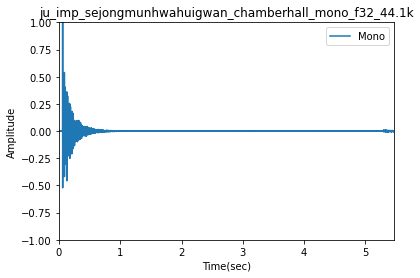

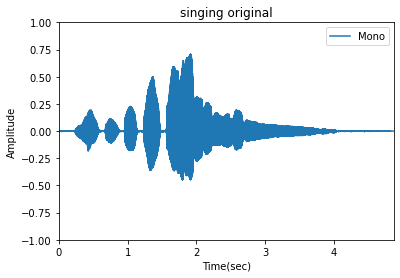

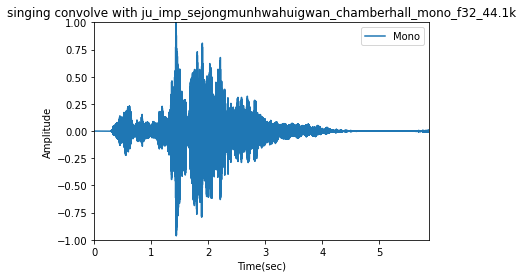

In [4]:
# FFT Convolution Function Test
# Test Audio data with Impulse data

data_convolve_temp = sig.fftconvolve( data_aud, data_imp )
valMax = np.max(data_convolve_temp)
# print(data_aud.shape[0], st_fmt_aud.fs, data_aud.shape[0]+st_fmt_aud.fs)
data_convolve = ( data_convolve_temp[0:(data_aud.shape[0]+st_fmt_aud.fs)] / valMax )    # audio data time + 1 sec (it's not full length of convolution)

dbg.dPlotAudio(st_fmt_imp.fs, data_imp, imp_name_temp, "Mono", "Time(sec)", "Amplitude")
dbg.dPlotAudio(st_fmt_aud.fs, data_aud, aud_name + ' original', "Mono", "Time(sec)", "Amplitude")
dbg.dPlotAudio(st_fmt_aud.fs, data_convolve, aud_name + ' convolve with ' + imp_name_temp, "Mono", "Time(sec)", "Amplitude")

# If you want save  result to wave file, do uncomment below line


# 콘볼루션 결과 저장
 - result 폴더에 콘볼루션 결과를 wav파일로 저장
 - mono / float32 / 44.1kHz
 

In [5]:
# Save wav file Convolution Result

dir_result = 'resultfiles'
sname = pyOssWavfile.str_fname( dir_result, aud_name + '_' + imp_name + str_info )
print( sname )
pyOssWavfile.write( sname, st_fmt_aud.fs, data_convolve )
print('* Save complete convolution data')


c:\Users\iMacPC\Documents\workspace_py\pyOssAudioAnalyzer\resultfiles\singing_ju_imp_sejongmunhwahuigwan_chamberhall_mono_f32_44.1k.wav
* Save complete convolution data
